In [1]:
import toad
import pandas as pd
import numpy as np
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
import os
from sklearn import tree  
path='./'

D:\a\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
class auto_tree(object):
   
    def __init__(self,datasets,ex_lis,dep='label',min_samples=0.05,min_samples_leaf=200,min_samples_split=20,max_depth=4,is_bin=True):

        '''
        datasets:数据集 dataframe格式
        ex_lis：不参与建模的特征，如id，时间切片等。list格式
        min_samples：分箱时最小箱的样本占总比 numeric格式
        max_depth：决策树最大深度 numeric格式
        min_samples_leaf：决策树子节点最小样本个数 numeric格式
        min_samples_split：决策树划分前，父节点最小样本个数 numeric格式
        is_bin：是否进行卡方分箱 bool格式（True/False）
        '''
        self.datasets = datasets
        self.ex_lis = ex_lis
        self.dep = dep
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        self.is_bin = is_bin

        self.bins = 0
        
    def fit_plot(self):
        os.environ["PATH"] += os.pathsep + 'D:/Graphviz/bin/'
        dtree = tree.DecisionTreeClassifier(max_depth=self.max_depth,
                                           min_samples_leaf=self.min_samples_leaf, 
                                           min_samples_split=self.min_samples_split)
        
        x = self.datasets.drop(self.ex_lis,axis=1)
        y = self.datasets[self.dep]
        
        if self.is_bin:
            #分箱
            combiner = toad.transform.Combiner()
            combiner.fit(x,y,method='chi',min_samples = self.min_samples)

            x_bin= combiner.transform(x)
            self.bins = combiner.export()        
        else:
            x_bin = x.copy()
            
        dtree = dtree.fit(x_bin,y) 
        x_bin.to_csv('x_bin',index=None)
        
        df_bin = x_bin.copy()
        
        df_bin[self.dep] = y
        
        with open(path + "dt.dot", "w") as f:
            tree.export_graphviz(dtree, out_file=f)
        dot_data = StringIO()
        dot_data_=tree.export_graphviz(dtree, out_file=None,
                                 feature_names=x_bin.columns,
                                 class_names=np.unique(y),
                                 filled=True, rounded=True,
                                 special_characters=True,proportion=True)
        # graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
        graph = pydotplus.graph_from_dot_data(dot_data_)
        graph.write_pdf("output.pdf")

            
        return df_bin,self.bins,graph.create_png()

In [17]:
data=pd.read_excel('甜橙免催策略.xlsx',index_col=0,dtype=str)

In [18]:
data.columns

Index(['user_id', 'city', 'province', 'store_id', 'principal', 'open_date',
       'current_status', 'repayment_history', 'delayed_status',
       'contract_balance', 'delayed_days', 'mob', 'current_cycle_status',
       'recived_principal', 'unrecived_principal', 'total_punitive', 'idname',
       'x_idcardage', 'x_idcardgender', 'x_scorecard', 'period', 'all_due_amt',
       'due_punitive', 'pay_rate', 'cur_pay_rate', 'cur_repayment_history',
       'next_status', 'flow_status', 'max_overdue', 'M1_cnt', 'M0_cnt',
       'label', 'gender'],
      dtype='object')

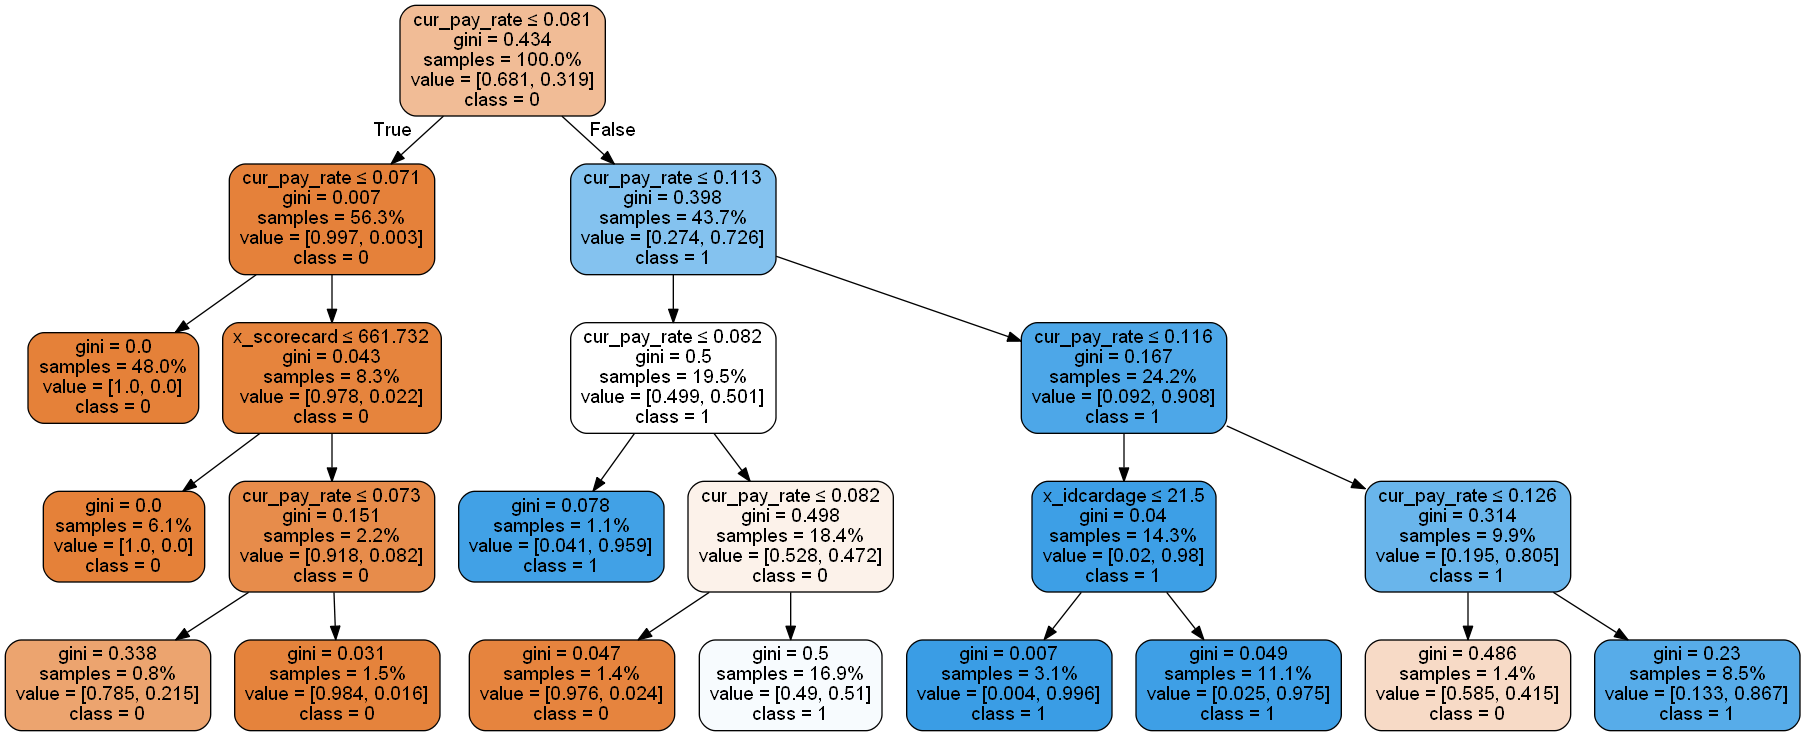

In [27]:
ex_lis = ['user_id', 'city', 'province', 'store_id','open_date',
       'current_status', 'repayment_history', 'delayed_status',
       'contract_balance', 'delayed_days', 'current_cycle_status',
       'recived_principal', 'idname','cur_repayment_history',
       'next_status', 'flow_status', 'label','mob','x_idcardgender',
       'due_punitive','total_punitive','period','unrecived_principal',
       'all_due_amt','principal','M0_cnt']
#调用决策树函数
df_bin,bins,graph = auto_tree(datasets = data,ex_lis = ex_lis,
                                       dep = 'label',min_samples=0.01,
                                       min_samples_leaf=50,min_samples_split=50,is_bin=False).fit_plot()
#展示图像
Image(graph)

In [31]:
class auto_tree(object):
   
    def __init__(self,datasets,ex_lis,dep='label',min_samples=0.05,min_samples_leaf=200,min_samples_split=20,max_depth=4,is_bin=True):

        '''
        datasets:数据集 dataframe格式
        ex_lis：不参与建模的特征，如id，时间切片等。list格式
        min_samples：分箱时最小箱的样本占总比 numeric格式
        max_depth：决策树最大深度 numeric格式
        min_samples_leaf：决策树子节点最小样本个数 numeric格式
        min_samples_split：决策树划分前，父节点最小样本个数 numeric格式
        is_bin：是否进行卡方分箱 bool格式（True/False）
        '''
        self.datasets = datasets
        self.ex_lis = ex_lis
        self.dep = dep
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        self.is_bin = is_bin

        self.bins = 0
        
    def fit_plot(self):
        os.environ["PATH"] += os.pathsep + 'D:/Graphviz/bin/'
        dtree = tree.DecisionTreeClassifier(max_depth=self.max_depth,
                                           min_samples_leaf=self.min_samples_leaf, 
                                           min_samples_split=self.min_samples_split)
        
        x = self.datasets[self.ex_lis]
        y = self.datasets[self.dep]
        
        if self.is_bin:
            #分箱
            combiner = toad.transform.Combiner()
            combiner.fit(x,y,method='chi',min_samples = self.min_samples)

            x_bin= combiner.transform(x)
            self.bins = combiner.export()        
        else:
            x_bin = x.copy()
            
        dtree = dtree.fit(x_bin,y) 
        x_bin.to_csv('x_bin',index=None)
        
        df_bin = x_bin.copy()
        
        df_bin[self.dep] = y
        
        with open(path + "dt.dot", "w") as f:
            tree.export_graphviz(dtree, out_file=f)
        dot_data = StringIO()
        dot_data_=tree.export_graphviz(dtree, out_file=None,
                                 feature_names=x_bin.columns,
                                 class_names=np.unique(y),
                                 filled=True, rounded=True,
                                 special_characters=True,proportion=True)
        # graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
        graph = pydotplus.graph_from_dot_data(dot_data_)
        graph.write_pdf("output.pdf")

            
        return df_bin,self.bins,graph.create_png()

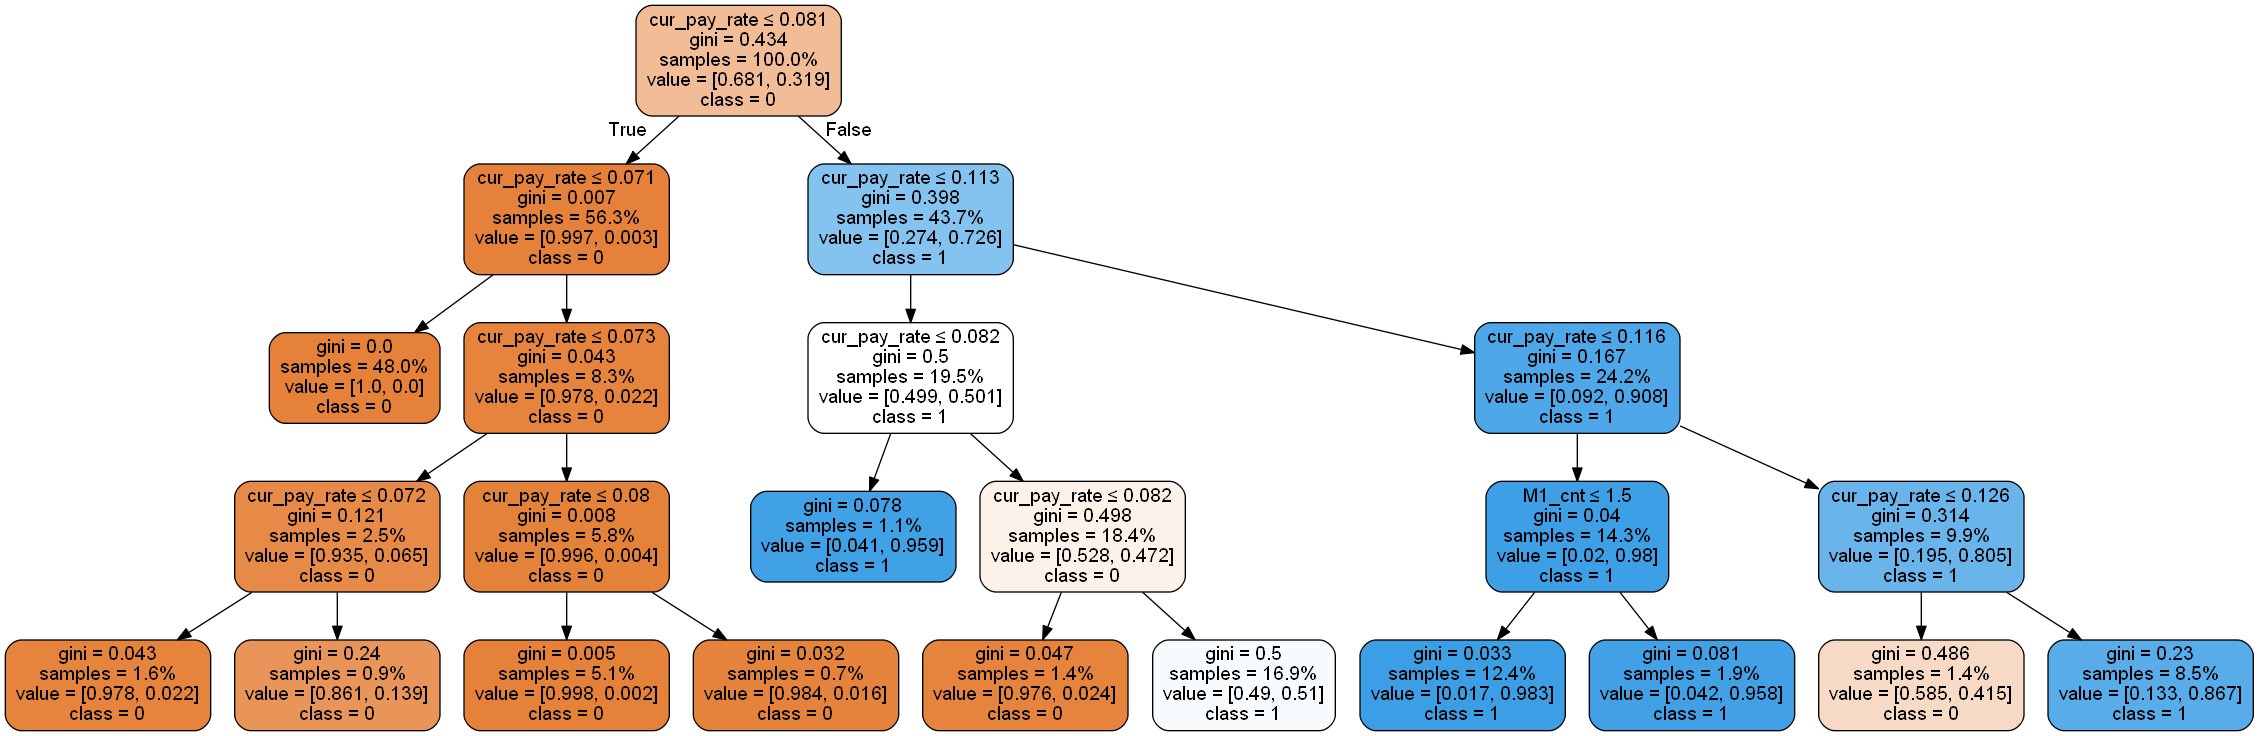

In [37]:
ex_lis = ['cur_pay_rate','M1_cnt']
#调用决策树函数
df_bin,bins,graph = auto_tree(datasets = data,ex_lis = ex_lis,
                                       dep = 'label',min_samples=0.01,
                                       min_samples_leaf=50,min_samples_split=50,is_bin=False).fit_plot()
#展示图像
Image(graph)

In [29]:
data.columns

Index(['user_id', 'city', 'province', 'store_id', 'principal', 'open_date',
       'current_status', 'repayment_history', 'delayed_status',
       'contract_balance', 'delayed_days', 'mob', 'current_cycle_status',
       'recived_principal', 'unrecived_principal', 'total_punitive', 'idname',
       'x_idcardage', 'x_idcardgender', 'x_scorecard', 'period', 'all_due_amt',
       'due_punitive', 'pay_rate', 'cur_pay_rate', 'cur_repayment_history',
       'next_status', 'flow_status', 'max_overdue', 'M1_cnt', 'M0_cnt',
       'label', 'gender'],
      dtype='object')